In [1]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns= iris.feature_names)
df['Target']= iris.get('target')

In [2]:
features = df.drop(columns=['Target']).columns
X = df[features]
y = df['Target']


In [3]:
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [4]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
df_padronizado = pd.DataFrame(data=X,columns=features)
display(df_padronizado.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [5]:
from sklearn.decomposition import  PCA

pca = PCA(n_components=2)
principalComponentes = pca.fit_transform(X)

In [6]:
df_pca = pd.DataFrame(data=principalComponentes,columns=['PC1','PC2'])
target = pd.Series(iris['target'], name='target')
result_df =pd.concat([df_pca,target],axis=1)
result_df

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [11]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))
#

Variance of each component: [0.72962445 0.22850762]

 Total Variance Explained: 95.81


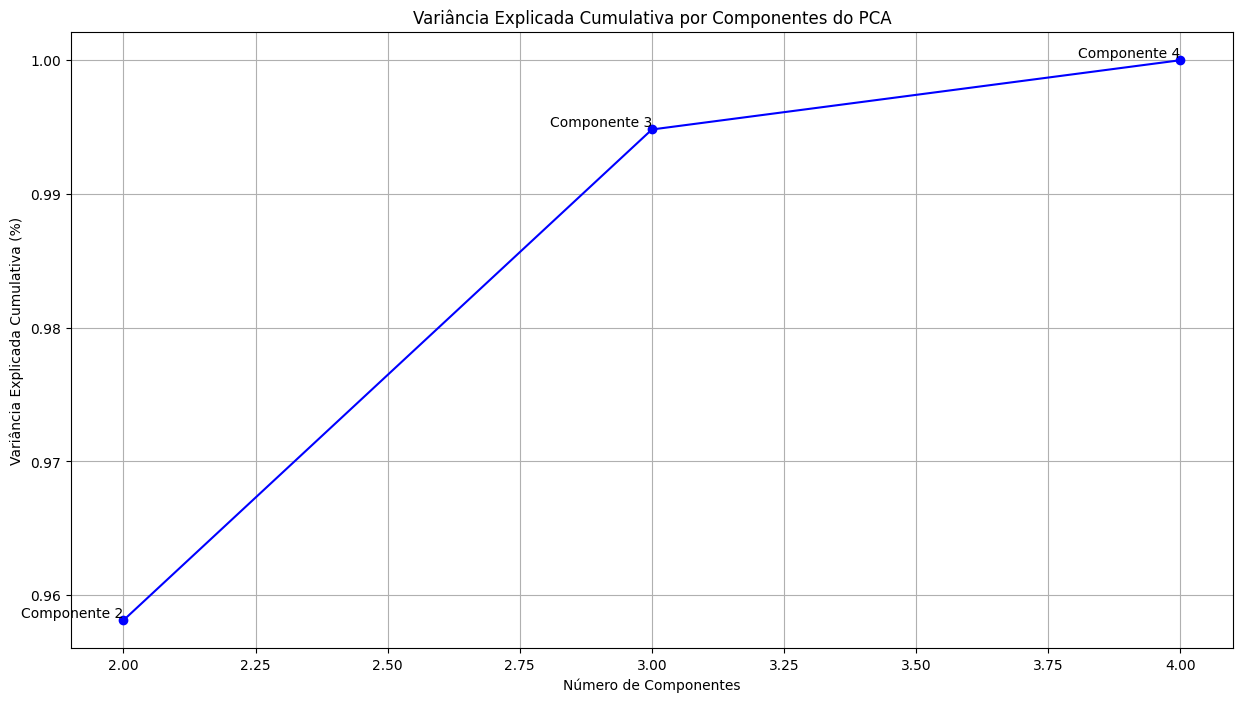

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


results = []

for n in range(2,5):

    pca = PCA(n_components=n)
    pca.fit(X)

    explained_variance = np.sum(pca.explained_variance_ratio_)
    results.append(explained_variance)

plt.figure(figsize=(15, 8))
plt.plot(range(2, 5), results, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa (%)')
plt.title('Variância Explicada Cumulativa por Componentes do PCA')
plt.grid(True)
for i, (n_components, explained_var) in enumerate(zip(range(2, 5), results)):
    plt.text(n_components, explained_var, f'Componente {n_components}', ha='right', va='bottom')
plt.show()

